# Training Models

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Linear Regression: two methods of training.<br/>
* using a direct closed-form equation that directly computes the model parameters that best fit the model to the training set.
* using an iterative optimization technique, Gradient Descent (GD), gradually tweaks the model parameters to minimize the cost
function over the training set, converges to the same set of parameters at the first method.<br/>
Polynomial Regression: can fit non-linear datasets.<br/> 

In [2]:
# the linear model makes a prediction by computing the weighted sum of the input features, plus a constant  called the
# bias term, aka intercept term
# For linear regression find parameter vector that minimizes the MSE (easier than RMSE) and gives same value


## The Normal Equation
To find the value of theta that minimizes the cost function- there is a closed form solution called the Normal Equation.

In [3]:
import numpy as np
# generate some linear data to work with.
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# compute the inverse of a matrix
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.15236249],
       [2.83539547]])

Ideal results would be [4,3] but the added noise makes it impossible to get the exact parameters.

In [4]:
# make predictions using theta hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  #  add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.15236249],
       [9.82315343]])

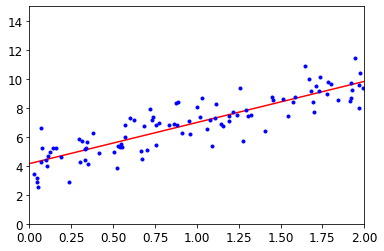

In [5]:
# plot the predictions

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# perform a linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_   

(array([4.15236249]), array([[2.83539547]]))

In [7]:
lin_reg.predict(X_new)

array([[4.15236249],
       [9.82315343]])

In [8]:
# linear regression is based on least squares, that can be called directly
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.15236249],
       [2.83539547]])

In [9]:
# compute the pseudoinverse directly
np.linalg.pinv(X_b).dot(y)

array([[4.15236249],
       [2.83539547]])

### Computational Complexity
Linear Regress class is O(n^2)

### Gradient Descent
Generic optimization algorithm- finds optimal solutions fo a range of problems<br/>
This is done by tweaking parameters iteratively.<br/>
The learning rate hyperparameter: start with random numbers then improve gradually. If the learning rate is too small,
it will take to many iterations to converge, if it is too large, you may jump past the optimal solution and never get a
solution.

### Batch Gradient Descent
To compute the gradient descent- compute the gradient of the cost function with regards to each model parameter.<br/>
This is basically calculating the cost function if you change the model parameter a little (partial derivative). <br/>
These don't need to be calculated individually- they can be done at one time.

In [10]:
# gradient descent implementation

# if the learning rate is low, it will take a long time, if too high, it jumps all over the place
# a grid search can be used to find the optimal learning rates (limit iterations so long convergence times are eliminated)
# interrupt the test when the gradient vector becomes tiny (not much is gained)

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.15236249],
       [2.83539547]])


## Stochastic Gradient Descent
Batch gradient descent uses the whole training set for each step, making it slow for large datasets.  SGD picks a random
instance at each step and computes gradients on only those sets.  This makes this faster and workable for huge datasets.<br/>
It is much less 